#### Imports

In [37]:
import pandas as pd
import random
from Perceptron import *

random.seed(1755920)

#### Maken van een waarheidstabel

In [38]:
def create_table_data(function, expectations):
    """Deze functie berekent de uitkomst van een perceptron/netwerk en geeft dit terug in een goed format"""
    data = []

    for item in expectations:

        output = function(item[0])
        data.append([item[0], output])
    return data


In [39]:
def print_table(data, caption):
    """Deze functie print een waarheidstabel"""

    columns = ['Input', 'Output']

    df = pd.DataFrame.from_records(data, columns=columns)
    print(f'<{caption}>\n {df}\n')
    

#### Uitkomsten testen

In [40]:
def test_outcome(expectation, outcome):
    """Deze functie test of de uitkomst van een perceptron/netwerk hetzelfde is als de verwachting.
    Ik heb gekozen om dit op deze 'assert' manier te doen omdat deze functie nu makkelijk en flexibel aan te roepen is.
    """

    if expectation == outcome:
        print("Test geslaagd - Verwachting & uitkomst hetzelfde")
    else:
        print('Test mislukt - Verwachting & uitkomst niet hetzelfde')

#### Random startwaarden

In [41]:
def generate_random_float():
    return round(random.uniform(-10, 10),1)

def generate_random_list(numbers):
    lst = []
    for item in range(numbers):
        lst.append(generate_random_float())
    return lst


## Testen

#### AND gate
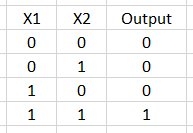

In [42]:
AND = Perceptron('AND', generate_random_float(), generate_random_list(2))
print(AND)

expectations = [[[False, False], False],
                [[False, True], False],
                [[True, False], False],
                [[True, True], True]]
print_table(expectations, 'Verwachting')

output = create_table_data(AND.activation, expectations)
print_table(output, 'Uitkomst')
test_outcome(expectations, output)
print(f'Error = {AND.error(expectations)}\n======================\nUPDATE\n')

AND.update(expectations, 500)
print(AND)
updated_output = create_table_data(AND.activation, expectations)
print_table(updated_output, 'Uitkomst')
test_outcome(expectations, updated_output)
print(f'Error = {AND.error(expectations)}\n======================')

<AND port>
- Bias = -5.0
- Weights = [-10.0, -0.5]

<Verwachting>
             Input  Output
0  [False, False]   False
1   [False, True]   False
2   [True, False]   False
3    [True, True]    True

<Uitkomst>
             Input  Output
0  [False, False]   False
1   [False, True]   False
2   [True, False]   False
3    [True, True]   False

Test mislukt - Verwachting & uitkomst niet hetzelfde
Error = 0.25
UPDATE

<AND port>
- Bias = -2.300000000000002
- Weights = [0.19999999999998122, 2.2000000000000006]

<Uitkomst>
             Input  Output
0  [False, False]   False
1   [False, True]   False
2   [True, False]   False
3    [True, True]    True

Test geslaagd - Verwachting & uitkomst hetzelfde
Error = 0.0


Uitkomst: AND port is goed te maken met de Perceptron learning rule

#### XOR gate
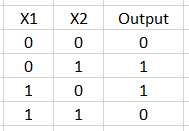




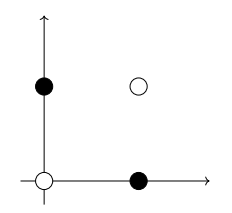

(Niet linear scheidbaar)

In [43]:
XOR = Perceptron('XOR', generate_random_float(), generate_random_list(2))
print(XOR)

expectations = [[[False, False], False],
                [[False, True], True],
                [[True, False], True],
                [[True, True], False]]
print_table(expectations, 'Verwachting')

output = create_table_data(XOR.activation, expectations)
print_table(output, 'Uitkomst')
test_outcome(expectations, output)
print(f'Error = {XOR.error(expectations)}\n======================\nUPDATE\n')

XOR.update(expectations, 5000)
print(XOR)
updated_output = create_table_data(XOR.activation, expectations)
print_table(updated_output, 'Uitkomst')
test_outcome(expectations, updated_output)
print(f'Error = {XOR.error(expectations)}\n======================')

<XOR port>
- Bias = 1.6
- Weights = [-1.6, 9.1]

<Verwachting>
             Input  Output
0  [False, False]   False
1   [False, True]    True
2   [True, False]    True
3    [True, True]   False

<Uitkomst>
             Input  Output
0  [False, False]    True
1   [False, True]    True
2   [True, False]    True
3    [True, True]    True

Test mislukt - Verwachting & uitkomst niet hetzelfde
Error = 0.5
UPDATE

<XOR port>
- Bias = 0.09999999999999981
- Weights = [-0.19999999999999982, -0.09999999999998477]

<Uitkomst>
             Input  Output
0  [False, False]    True
1   [False, True]    True
2   [True, False]   False
3    [True, True]   False

Test mislukt - Verwachting & uitkomst niet hetzelfde
Error = 0.5


Uitkomst: XOR port is niet met 1 perceptron te maken, dit komt omdat het niet linear scheidbaar is.

## IRIS dataset


### Setosa & Versicolour
Classificeer eerst alleen de types Setosa en Versicolour. Wat zijn de uiteindelijke parameters van de perceptron?

In [44]:
from sklearn.datasets import load_iris

data = load_iris()

In [45]:
"""We mogen helaas geen pandas gebruiken, daarop selecteren we iets knullig de juiste rijen"""

set_ver_features = data['data'][:100]
set_ver_targets = data['target'][:100]

iris_data_2 = []
for index in range(len(set_ver_features)):
    iris_data_2.append([list(set_ver_features[index]), set_ver_targets[index]])
iris_data_2[:10]

[[[5.1, 3.5, 1.4, 0.2], 0],
 [[4.9, 3.0, 1.4, 0.2], 0],
 [[4.7, 3.2, 1.3, 0.2], 0],
 [[4.6, 3.1, 1.5, 0.2], 0],
 [[5.0, 3.6, 1.4, 0.2], 0],
 [[5.4, 3.9, 1.7, 0.4], 0],
 [[4.6, 3.4, 1.4, 0.3], 0],
 [[5.0, 3.4, 1.5, 0.2], 0],
 [[4.4, 2.9, 1.4, 0.2], 0],
 [[4.9, 3.1, 1.5, 0.1], 0]]

In [46]:
"""Perceptron aanmaken"""
IRIS2 = Perceptron('IRIS2', generate_random_float(), generate_random_list(len(iris_data_2[0][0])))
print(IRIS2)

print_table(iris_data_2, 'Verwachting')

output = create_table_data(IRIS2.activation, iris_data_2)
print_table(output, 'Uitkomst')

"""Error berekenen van ongetrainde perceptron"""
test_outcome(iris_data_2, output)
print(f'Error = {IRIS2.error(iris_data_2)}\n======================\n\n')

"""Perceptron trainen/updaten"""
IRIS2.update(iris_data_2, 5000)
print(f'UPDATED\n{IRIS2}')
updated_output = create_table_data(IRIS2.activation, iris_data_2)
print_table(updated_output, 'Uitkomst')

"""Error berekenen van getrainde perceptron"""
test_outcome(iris_data_2, updated_output)
print(f'Error = {IRIS2.error(iris_data_2)}\n======================')

<IRIS2 port>
- Bias = -5.1
- Weights = [4.4, 9.5, 9.7, 0.3]

<Verwachting>
                    Input  Output
0   [5.1, 3.5, 1.4, 0.2]       0
1   [4.9, 3.0, 1.4, 0.2]       0
2   [4.7, 3.2, 1.3, 0.2]       0
3   [4.6, 3.1, 1.5, 0.2]       0
4   [5.0, 3.6, 1.4, 0.2]       0
..                   ...     ...
95  [5.7, 3.0, 4.2, 1.2]       1
96  [5.7, 2.9, 4.2, 1.3]       1
97  [6.2, 2.9, 4.3, 1.3]       1
98  [5.1, 2.5, 3.0, 1.1]       1
99  [5.7, 2.8, 4.1, 1.3]       1

[100 rows x 2 columns]

<Uitkomst>
                    Input  Output
0   [5.1, 3.5, 1.4, 0.2]    True
1   [4.9, 3.0, 1.4, 0.2]    True
2   [4.7, 3.2, 1.3, 0.2]    True
3   [4.6, 3.1, 1.5, 0.2]    True
4   [5.0, 3.6, 1.4, 0.2]    True
..                   ...     ...
95  [5.7, 3.0, 4.2, 1.2]    True
96  [5.7, 2.9, 4.2, 1.3]    True
97  [6.2, 2.9, 4.3, 1.3]    True
98  [5.1, 2.5, 3.0, 1.1]    True
99  [5.7, 2.8, 4.1, 1.3]    True

[100 rows x 2 columns]

Test mislukt - Verwachting & uitkomst niet hetzelfde
Error = 0.5


UPD

### Setosa & Versicolour & Verginica (3 Types)
Classificeer daarna alle drie de types, dus ook Verginica. Wat zijn de uiteindelijke parameters van de perceptron?

In [47]:
set_ver_ver_features = data['data']
set_ver_ver_targets = data['target']

# Dataset
iris_data_3 = []
for index in range(len(set_ver_ver_features)):
    iris_data_3.append([list(set_ver_ver_features[index]), set_ver_ver_targets[index]])
iris_data_3

[[[5.1, 3.5, 1.4, 0.2], 0],
 [[4.9, 3.0, 1.4, 0.2], 0],
 [[4.7, 3.2, 1.3, 0.2], 0],
 [[4.6, 3.1, 1.5, 0.2], 0],
 [[5.0, 3.6, 1.4, 0.2], 0],
 [[5.4, 3.9, 1.7, 0.4], 0],
 [[4.6, 3.4, 1.4, 0.3], 0],
 [[5.0, 3.4, 1.5, 0.2], 0],
 [[4.4, 2.9, 1.4, 0.2], 0],
 [[4.9, 3.1, 1.5, 0.1], 0],
 [[5.4, 3.7, 1.5, 0.2], 0],
 [[4.8, 3.4, 1.6, 0.2], 0],
 [[4.8, 3.0, 1.4, 0.1], 0],
 [[4.3, 3.0, 1.1, 0.1], 0],
 [[5.8, 4.0, 1.2, 0.2], 0],
 [[5.7, 4.4, 1.5, 0.4], 0],
 [[5.4, 3.9, 1.3, 0.4], 0],
 [[5.1, 3.5, 1.4, 0.3], 0],
 [[5.7, 3.8, 1.7, 0.3], 0],
 [[5.1, 3.8, 1.5, 0.3], 0],
 [[5.4, 3.4, 1.7, 0.2], 0],
 [[5.1, 3.7, 1.5, 0.4], 0],
 [[4.6, 3.6, 1.0, 0.2], 0],
 [[5.1, 3.3, 1.7, 0.5], 0],
 [[4.8, 3.4, 1.9, 0.2], 0],
 [[5.0, 3.0, 1.6, 0.2], 0],
 [[5.0, 3.4, 1.6, 0.4], 0],
 [[5.2, 3.5, 1.5, 0.2], 0],
 [[5.2, 3.4, 1.4, 0.2], 0],
 [[4.7, 3.2, 1.6, 0.2], 0],
 [[4.8, 3.1, 1.6, 0.2], 0],
 [[5.4, 3.4, 1.5, 0.4], 0],
 [[5.2, 4.1, 1.5, 0.1], 0],
 [[5.5, 4.2, 1.4, 0.2], 0],
 [[4.9, 3.1, 1.5, 0.2], 0],
 [[5.0, 3.2, 1.2, 0.

In [48]:
"""Perceptron aanmaken"""
IRIS3 = Perceptron('IRIS3', generate_random_float(), generate_random_list(len(iris_data_3[0][0])))
print(IRIS3)

print_table(iris_data_3, 'Verwachting')

output = create_table_data(IRIS3.activation, iris_data_3)
print_table(output, 'Uitkomst')

"""Error berekenen van ongetrainde perceptron"""
test_outcome(iris_data_3, output)
print(f'Error = {IRIS3.error(iris_data_3)}\n======================\n\n')

"""Perceptron trainen/updaten"""
IRIS3.update(iris_data_3, 5000)
print(f'UPDATED\n{IRIS3}')
updated_output = create_table_data(IRIS3.activation, iris_data_3)
print_table(updated_output, 'Uitkomst')

"""Error berekenen van getrainde perceptron"""
test_outcome(iris_data_3, updated_output)
print(f'Error = {IRIS3.error(iris_data_3)}\n======================')

<IRIS3 port>
- Bias = -3.2
- Weights = [6.3, 6.5, -7.2, 7.7]

<Verwachting>
                     Input  Output
0    [5.1, 3.5, 1.4, 0.2]       0
1    [4.9, 3.0, 1.4, 0.2]       0
2    [4.7, 3.2, 1.3, 0.2]       0
3    [4.6, 3.1, 1.5, 0.2]       0
4    [5.0, 3.6, 1.4, 0.2]       0
..                    ...     ...
145  [6.7, 3.0, 5.2, 2.3]       2
146  [6.3, 2.5, 5.0, 1.9]       2
147  [6.5, 3.0, 5.2, 2.0]       2
148  [6.2, 3.4, 5.4, 2.3]       2
149  [5.9, 3.0, 5.1, 1.8]       2

[150 rows x 2 columns]

<Uitkomst>
                     Input  Output
0    [5.1, 3.5, 1.4, 0.2]    True
1    [4.9, 3.0, 1.4, 0.2]    True
2    [4.7, 3.2, 1.3, 0.2]    True
3    [4.6, 3.1, 1.5, 0.2]    True
4    [5.0, 3.6, 1.4, 0.2]    True
..                    ...     ...
145  [6.7, 3.0, 5.2, 2.3]    True
146  [6.3, 2.5, 5.0, 1.9]    True
147  [6.5, 3.0, 5.2, 2.0]    True
148  [6.2, 3.4, 5.4, 2.3]    True
149  [5.9, 3.0, 5.1, 1.8]    True

[150 rows x 2 columns]

Test mislukt - Verwachting & uitkomst niet he

### Uitkomst

Uiteindelijk zijn de uitkomsten voor 33.3% goed. Aan de output te zien heeft elke input een uiteindelijke uitput van True. Aan de Weights valt ook iets op, deze zijn heel erg hoog. De beredenatie is simpel. De enige uitkomsten die een Perceptron kan geven zijn Waar of Onwaar (1 of 0). Dit zijn dus 2 opties. door het toevoegen van een 3e optie heb ik het onmogelijk gemaakt om een goed model te maken (want de uitkomst kan nooit 2 zijn bijvoorbeeld). Omdat het niet mogelijk is om de weights zo bij te stellen dat de uitkomst goed is blijft deze maar omhoog gaan en klopt er uiteindelijk eigenlijk helemaal niks van! 